In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('../data/train.csv')
test= pd.read_csv('../data/test.csv')

In [3]:
train.drop(['HouseStyle','BldgType','GarageCars','Utilities'], axis=1, inplace=True)

In [4]:
cut_out=train.columns[train.count().values<0.1*len(train)].tolist()
cut_out

['Alley', 'PoolQC', 'MiscFeature']

In [5]:
train.drop(cut_out,axis=1,inplace=True)

In [6]:
train['Diff_in_Ext']=train.apply(lambda x: 1 if x.Exterior2nd!=x.Exterior1st else 0, axis=1)

In [7]:
train[train.Diff_in_Ext==1].loc[:,['Exterior1st','Exterior2nd']]

,Exterior1st,Exterior2nd
3,Wd Sdng,Wd Shng
8,BrkFace,Wd Shng
11,WdShing,Wd Shng
12,HdBoard,Plywood
19,BrkFace,Plywood
23,CemntBd,CmentBd
39,AsbShng,Plywood
44,BrkFace,Wd Sdng
53,WdShing,Wd Shng
55,HdBoard,Plywood


there is a diff in names. lets fix that

In [8]:
sorted(train.Exterior1st.unique())

['AsbShng',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing']

In [9]:
sorted(train.Exterior2nd.unique())

['AsbShng',
 'AsphShn',
 'Brk Cmn',
 'BrkFace',
 'CBlock',
 'CmentBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Other',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'Wd Shng']

Brk Cmn= BrkComm
Wd Shng=WdShing
CmentBd=CemntBd

In [10]:
fix1=train[train.Exterior2nd=='Brk Cmn'].index.tolist()
train.loc[fix1,'Exterior2nd']='BrkComm'

fix2=train[train.Exterior2nd=='Wd Shng'].index.tolist()
train.loc[fix2,'Exterior2nd']='WdShing'

fix3=train[train.Exterior2nd=='CmentBd'].index.tolist()
train.loc[fix3,'Exterior2nd']='CemntBd'

fix4=test[test.Exterior2nd=='Brk Cmn'].index.tolist()
test.loc[fix4,'Exterior2nd']='BrkComm'

fix5=test[test.Exterior2nd=='Wd Shng'].index.tolist()
test.loc[fix5,'Exterior2nd']='WdShing'

fix6=test[test.Exterior2nd=='CmentBd'].index.tolist()
test.loc[fix6,'Exterior2nd']='CemntBd'

now we can calculate diff once more

In [11]:
train['Diff_in_Ext']=train.apply(lambda x: 1 if x.Exterior2nd!=x.Exterior1st else 0, axis=1)
train[train.Diff_in_Ext==1].loc[:,['Exterior1st','Exterior2nd']]

,Exterior1st,Exterior2nd
3,Wd Sdng,WdShing
8,BrkFace,WdShing
12,HdBoard,Plywood
19,BrkFace,Plywood
39,AsbShng,Plywood
44,BrkFace,Wd Sdng
55,HdBoard,Plywood
69,BrkFace,AsbShng
71,HdBoard,Plywood
90,BrkFace,Wd Sdng


In [12]:
train.drop('Exterior2nd',axis=1,inplace=True)

In [13]:
map_overall_to_cat={10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',
                    3:'Fair',2:'Poor',1:'Very Poor'}

train.OverallCond=train.OverallCond.map(map_overall_to_cat)
train.OverallQual=train.OverallQual.map(map_overall_to_cat)

In [14]:
cat_c=[]
for c in train.columns.tolist():
    if train[c].dtypes=='int64' or train[c].dtypes=='float64':
        continue
    else:
        cat_c.append(c)
cat_c.remove('MSZoning')
cat_c

['Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [15]:
def make_dummies_conditional_on_len(train,c):
    df=train.groupby(c).Id.count()
    for i in df.index.tolist():
        if df.loc[i]>=50:
            name=str(c)+'_'+str(i)
            train[name]=np.where(train[c]==i,1,0)
    train.drop(c,axis=1, inplace=True)

for c in cat_c:
    make_dummies_conditional_on_len(train,c)

In [16]:
train.drop(['SaleType_New', 'CentralAir_Y','LandSlope_Gtl' ,'BsmtFinType2_Unf',
            'Foundation_PConc','RoofStyle_Gable', 'PavedDrive_Y','Electrical_SBrkr'], axis=1,inplace=True)


In [17]:
train.shape

(1460, 135)

# Fixing errors in data

In [18]:
fix_year=test.loc[test.GarageYrBlt>2010].GarageYrBlt.index.values.tolist()
test.loc[fix_year,'GarageYrBlt']=np.nan

columns_to_clean=train.isnull().any().tolist()

train.loc[:,columns_to_clean].columns.tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [19]:
LotFrontage_to_fix=train[train.LotFrontage.isnull()].index.tolist()
train.loc[LotFrontage_to_fix,'LotFrontage']=train.LotFrontage.mean()

MasVnrArea_to_fix=train[train.MasVnrArea.isnull()].index.tolist()
train.loc[MasVnrArea_to_fix,'MasVnrArea']=0

GarageYrBlt_to_fix=train[train.GarageYrBlt.isnull()].index.tolist()
train.loc[GarageYrBlt_to_fix,'GarageYrBlt']=train.GarageYrBlt.mean().round(0)

In [20]:
def turn_MS_data_into_cat(df):
    for i in df.MSSubClass.unique().tolist():
        for j in df.MSZoning.unique().tolist():
            if df[(df.MSSubClass==i)&(df.MSZoning==j)].Id.count()>=20:
                name=str(i)+'_'+str(j)
                df[name]=np.where((df.MSSubClass==i)&(df.MSZoning==j),1,0)
    df.drop(['MSSubClass','MSZoning'], axis=1, inplace=True)
turn_MS_data_into_cat(train)

train.drop('YearBuilt', axis=1, inplace=True)

train.loc[train[train.YearRemodAdd>train.YrSold].index,'YearRemodAdd']=2007
test.loc[test[test.YearRemodAdd>test.YrSold].index, 'YearRemodAdd']=2007 

In [21]:
train['Avg_room_size']=train.GrLivArea/train.TotRmsAbvGrd

# open things
GarageQual_TA and GarageCond_TA- TBD (i want to think about the entire garage and basement as well)

1stFlrSF its a dillema. we can investigate if there's an effect if it different then basement or do PCA

In [22]:
train=pd.concat([train,pd.get_dummies(train.BedroomAbvGr, prefix="br")], axis=1)

train.drop('br_8', axis=1, inplace=True)
train['Log_sale_price']=np.log10(train.SalePrice)
train.drop('SalePrice', axis=1, inplace=True)

columns_to_keep=train.columns.tolist()
columns_to_keep.remove('Log_sale_price')
columns_to_keep.remove('Id')
columns_to_keep.remove('YrSold')
columns_to_keep.remove('MoSold')


X=train[columns_to_keep]
y=train.Log_sale_price
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

regressor_OLS = sm.OLS(y_train,x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Log_sale_price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     55.61
Date:                Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:02:25   Log-Likelihood:                 1556.5
No. Observations:                1022   AIC:                            -2815.
Df Residuals:                     873   BIC:                            -2081.
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
LotFrontage               -5.557e-05      0.000     -0.437      0.662      -0.000       0.000
LotArea                    6.576e-07   2.38e-07      2.761      0.006     1.9e-07    1.13e-06
YearRemodAdd                  0.0004      0.000      2.442      0.015    7.62e-05       0.001
MasVnrArea                 1.752e-05   1.86e-05      0.943      0.346    -1.9e-05     5.4e-05
BsmtFinSF1                -6.463e-06   6.62e-06     -0.976      0.330   -1.95e-05    6.54e-06
BsmtFinSF2                 9.076e-06   1.19e-05      0.762      0.447   -1.43e-05    3.25e-05
BsmtUnfSF                 -4.691e-06   6.92e-06     -0.678      0.498   -1.83e-05     8.9e-06
TotalBsmtSF               -2.078e-06   1.03e-05     -0.202      0.840   -2.23e-05    1.81e-05
1stFlrSF                  -5.409e-05   1.78e-05     -3.031      0.003   -8.91e-05   -1.91e-05
2ndFlrSF                  -4.746e-05   1.62e-05     -2.928      0.004   -7.93e-05   -1.56e-05
LowQualFinSF              -2.408e-05   3.71e-05     -0.649      0.516   -9.69e-05    4.87e-05
GrLivArea                    -0.0001   2.39e-05     -5.263      0.000      -0.000   -7.88e-05
BsmtFullBath                  0.0156      0.006      2.631      0.009       0.004       0.027
BsmtHalfBath                  0.0044      0.009      0.505      0.614      -0.013       0.021
FullBath                      0.0292      0.007      4.429      0.000       0.016       0.042
HalfBath                      0.0179      0.006      3.027      0.003       0.006       0.029
BedroomAbvGr                  0.7337      0.096      7.609      0.000       0.544       0.923
KitchenAbvGr                 -0.0615      0.014     -4.417      0.000      -0.089      -0.034
TotRmsAbvGrd                  0.0724      0.007     10.198      0.000       0.058       0.086
Fireplaces                    0.0096      0.006      1.688      0.092      -0.002       0.021
GarageYrBlt                   0.0001      0.000      0.647      0.518      -0.000       0.000
GarageArea                 7.672e-05   1.72e-05      4.464      0.000     4.3e-05       0.000
WoodDeckSF                 5.132e-05   1.75e-05      2.935      0.003     1.7e-05    8.56e-05
OpenPorchSF                2.041e-05   3.17e-05      0.643      0.520   -4.19e-05    8.27e-05
EnclosedPorch             -7.783e-06   3.52e-05     -0.221      0.825   -7.68e-05    6.13e-05
3SsnPorch                  4.821e-05   6.01e-05      0.802      0.423   -6.97e-05       0.000
ScreenPorch                   0.0001   3.92e-05      3.102      0.002    4.47e-05       0.000
PoolArea                  -3.008e-05   5.22e-05     -0.576      0.564      -0.000    7.23e-05
MiscVal                    2.849e-06   3.78e-06      0.754      0.451   -4.57e-06    1.03e-05
Diff_in_Ext                  -0.0075      0.007     -1.060      0.290      

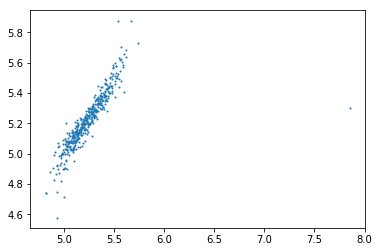

In [23]:
y_pred=regressor_OLS.predict(x_test)
plt.scatter(y_pred,y_test, s=1)

In [24]:
y_pred[y_pred>7]

635    7.850883
dtype: float64

In [25]:
mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
rmse

0.13551204414166385

In [26]:
columns_to_keep2=train.columns.tolist()
columns_to_keep2.remove('Log_sale_price')
columns_to_keep2.remove('Id')
columns_to_keep2.remove('YrSold')
columns_to_keep2.remove('MoSold')

X2=train[columns_to_keep2]
y2=train.Log_sale_price
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

((1022, 152), (438, 152), (1022,), (438,))

In [27]:
def backwardElimination(X, Y):
    for i in np.arange(0.9,0,-0.1):
        numVars = len(X.columns.tolist())
        d=[]
        regressor_OLS = sm.OLS(Y, X).fit()
        for j in range(numVars):
            if regressor_OLS.pvalues[j] > i:
                d.append(X.columns[j])
        for t in d:
            X=X.drop(t, axis=1)
    
    regressor_OLS = sm.OLS(Y, X).fit()
    while max(regressor_OLS.pvalues > i):
        numVars = len(X.columns.tolist())
        d=[]
        for j in range(numVars):
            if regressor_OLS.pvalues[j] > i:
                d.append(X.columns[j])
        for t in d:
            X=X.drop(t, axis=1)
        regressor_OLS = sm.OLS(Y, X).fit()
    
    print(regressor_OLS.summary())
    
    #predictions = regressor_OLS.predict(X)
    return regressor_OLS, X.columns.tolist()

regressor, ctp=backwardElimination(x_train2,y_train2)

                            OLS Regression Results                            
Dep. Variable:         Log_sale_price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:02:30   Log-Likelihood:                 1580.3
No. Observations:                1022   AIC:                            -3015.
Df Residuals:                     949   BIC:                            -2655.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
LotArea               

0.07031485073687246

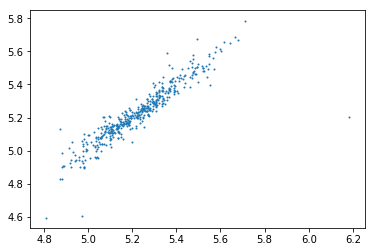

In [28]:
y_pred2=regressor.predict(x_test2[ctp])
plt.scatter(y_pred2,y_test2, s=1)

mse2 = mean_squared_error(y_pred2,y_test2)
rmse2 = np.sqrt(mse2)
rmse2

# submit

In [29]:
test.OverallCond=test.OverallCond.map(map_overall_to_cat)
test.OverallQual=test.OverallQual.map(map_overall_to_cat)
test['Diff_in_Ext']=test.apply(lambda x: 1 if x.Exterior2nd!=x.Exterior1st else 0, axis=1)

for c in cat_c:
    test=pd.concat([test,pd.get_dummies(test[c], prefix=c)], axis=1)

turn_MS_data_into_cat(test)

test=pd.concat([test,pd.get_dummies(test.BedroomAbvGr, prefix="br")], axis=1)



In [30]:
test['120_RM']=0
test['Avg_room_size']=test.GrLivArea/test.TotRmsAbvGrd

In [31]:
test_X=test[ctp]
test_X.loc[:,test_X.isnull().any()].columns.tolist()

['BsmtFinSF1', 'TotalBsmtSF', 'BsmtFullBath', 'GarageArea']

In [32]:
test.loc[test[test.BsmtFullBath.isnull()==True].index.tolist(),'BsmtFullBath']=0

test.loc[test[test.LotFrontage.isnull()==True].index.tolist(),'LotFrontage']=test.LotFrontage.mean()

test.loc[test[test.BsmtFinSF1.isnull()==True].index.tolist(),'BsmtFinSF1']=0

test.loc[test[test.GarageArea.isnull()==True].index.tolist(),'GarageArea']=0

test_X=test[ctp]
test_X.loc[:,test_X.isnull().any()].columns.tolist()

['TotalBsmtSF']

In [33]:
y_pred_test=regressor.predict(test_X)

y_pred_test.isnull().any()

True

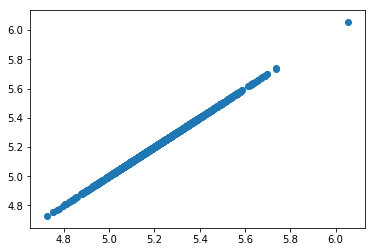

In [34]:
plt.scatter(y_pred_test,y_pred_test)

In [35]:
SalePrice=pd.Series(10**y_pred_test, name='SalePrice')

test=test.join(SalePrice)

submission = test.loc[:, ['Id', 'SalePrice']].copy()
submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
1461,121226.084880
1462,156432.391710
1463,186186.161609
1464,187230.594217
1465,182320.849673


In [36]:
#submission.to_csv('2nd_model.csv')